#custom data project

In [56]:
import torch
from torch import nn


In [57]:
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [58]:
from pathlib import Path


data_path=Path("data/")
image_path=data_path/"pizza_sushi_steak"

if image_path.is_dir():
  print("path alreadyy exists")

else:
  print("creating one..")
  image_path.mkdir(parents=True, exist_ok=True)



path alreadyy exists


#Collecting Data


In [59]:
#downloading the zipped data
import requests
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  response=requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(response.content)

In [60]:
#unzipping the data
import zipfile
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as f:
  print("unzipping...")
  f.extractall(image_path)

unzipping...


#

#creating a train and test directory

In [61]:
#creating a train directory
train_dir=image_path/"train"
test_dir=image_path/"test"

img path list : [PosixPath('data/pizza_sushi_steak/train/steak/1961025.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/3727036.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/1264154.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/3074367.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/1787505.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/75537.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/1225762.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/560503.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/231296.jpg'), PosixPath('data/pizza_sushi_steak/train/steak/1839481.jpg')]
random img choice : data/pizza_sushi_steak/train/steak/1624747.jpg
341
512
steak


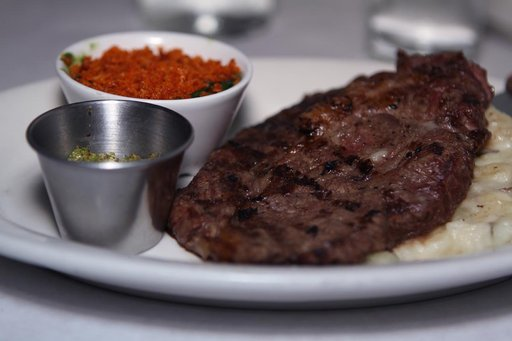

In [62]:
#lets visualize the data
#you can visuzlize using matplotlib or by using pillow library
from PIL import Image
import random
random.seed(42)

image_path_list=list(image_path.glob("*/*/*.jpg"))

random_img_choise=random.choice(image_path_list)

random_image=Image.open(random_img_choise)
random_img_class=random_img_choise.parent.stem

print(f"img path list : {image_path_list[:10]}")

print(f"random img choice : {random_img_choise}")

print(f"{random_image.height}")


print(f"{random_image.width}")
print(f"{random_img_class}")
random_image

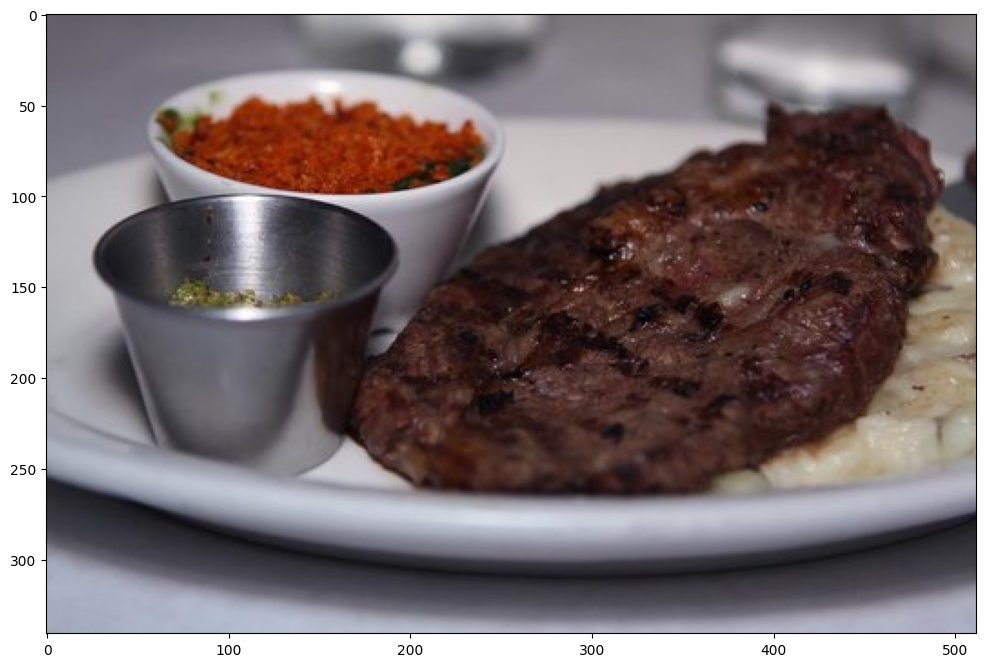

In [63]:
#lets do same using matplotlib
import matplotlib.pyplot as plt
import numpy as np

image_as_array=np.asarray(random_image)
plt.figure(figsize=(12,10))
plt.imshow(image_as_array)

#data transformation: it involoves resizing, flipping etc


In [64]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_sample=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()

])

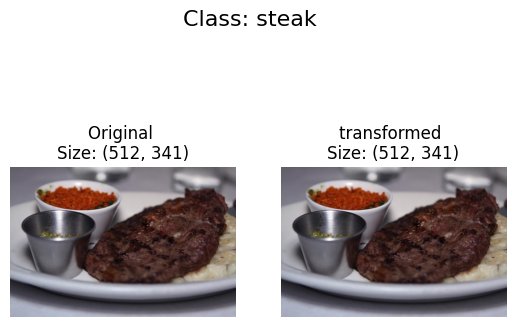

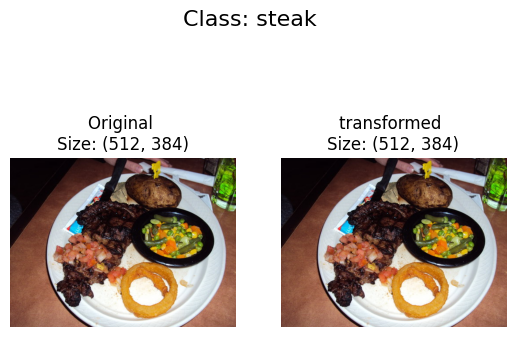

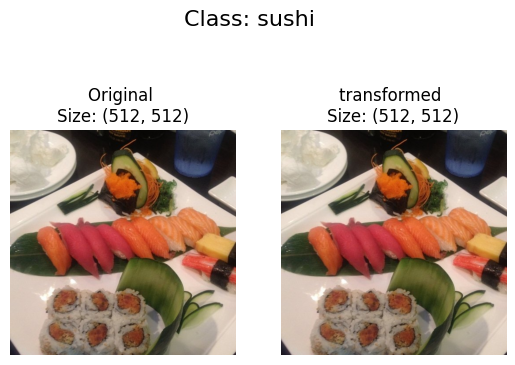

In [65]:
def plot_transformed_vs_untransformed(image_path,transform, n):
  random.seed(42)
  random_image=random.sample(image_path,k=n)
  for image_path in random_image:
    with Image.open(image_path) as f:
      fig,ax=plt.subplots(1,2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis("off")

      transformed_image=transform(f).permute(1,2,0)
      ax[1].imshow(f)
      ax[1].set_title(f"transformed \nSize: {f.size}")
      ax[1].axis("off")


      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_vs_untransformed(image_path_list,
                        transform=transform_sample,
                        n=3)

#Now its time to convert our data into dataset(we can use prebuilt ImageFolder from torchvision for that


In [66]:
from torchvision import datasets

train_dataset=datasets.ImageFolder(root=train_dir,
                                   transform=transform_sample,
                                   target_transform=None)


test_dataset=datasets.ImageFolder(root=test_dir,
                                   transform=transform_sample)

In [67]:
print(f"train dataset: {train_dataset}")

train dataset: Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_sushi_steak/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [68]:
print(f'test dataset: {test_dataset}')

test dataset: Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_sushi_steak/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [69]:
class_names=train_dataset.classes
class_names

['pizza', 'steak', 'sushi']

In [70]:
#we can also get the class names in index form
class_names_in_index=train_dataset.class_to_idx
class_names_in_index

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [71]:
len(train_dataset),len(test_dataset)

(225, 75)

In [72]:
train_dataset.samples[0]

('data/pizza_sushi_steak/train/pizza/1008844.jpg', 0)

In [73]:
train_dataset[0] #it gives image and label here label is 0 meaning its pizza

(tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
          [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
          [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
          ...,
          [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
          [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
          [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],
 
         [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
          [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
          [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
          ...,
          [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
          [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
          [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],
 
         [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
          [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
          [0.0196, 0.0157, 0.0157,  ...,

In [74]:
img,label=train_dataset[0][0],train_dataset[0][1]
img

tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0902, 0.0902, 0.

In [75]:
label

0

In [76]:
print(f'image shape: {img.shape}')
print(f'image type: {img.dtype}')
print(f'label: {label}')
print(f'type of label: {type(label)}')

image shape: torch.Size([3, 64, 64])
image type: torch.float32
label: 0
type of label: <class 'int'>


Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


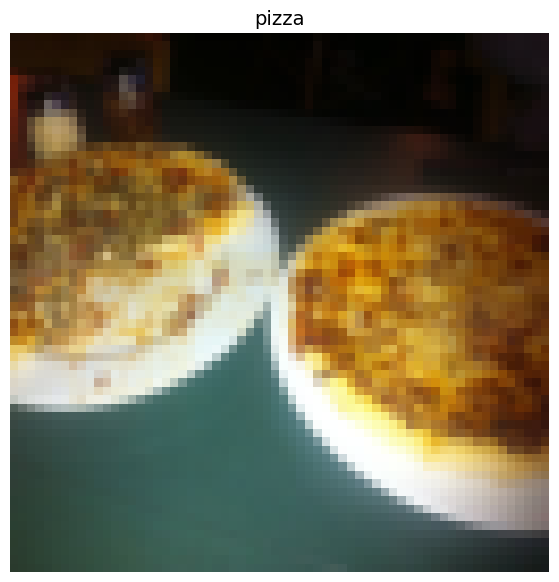

In [77]:
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

#now its time for converting our dataset into dataloader

In [78]:
train_dataloader=DataLoader(
    dataset=train_dataset,
    batch_size=1,
    num_workers=1,
    shuffle=True
)
test_dataloader=DataLoader(
    dataset=test_dataset,
    batch_size=1,
     num_workers=1
)

In [79]:
#there are other forms of augumentation too
simple_transform=transforms.Compose(
    [
        transforms.Resize(size=(64,64)),
        transforms.TrivialAugmentWide(num_magnitude_bins=31),
        transforms.ToTensor()
    ]
)

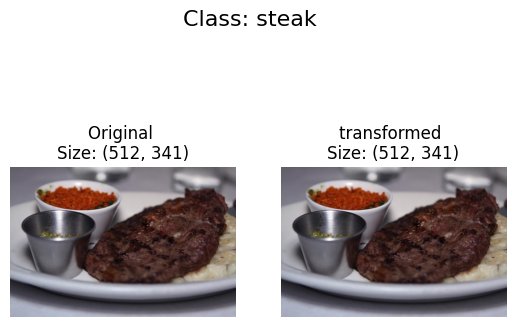

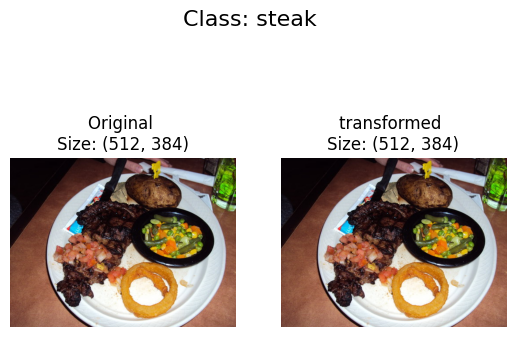

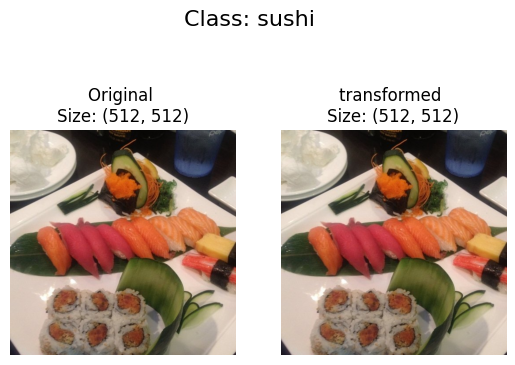

In [80]:
image_path_list = list(image_path.glob("*/*/*.jpg"))

# Plot random images
plot_transformed_vs_untransformed(
    image_path=image_path_list,
    transform=simple_transform,
    n=3

)

#now since we know all the basics now lets start our new journey of modeling where we will do simple transformations



##creating a dataset with simple transformations

In [81]:
#creating a train directory
train_dir=image_path/"train"
test_dir=image_path/"test"
#first lets create a simple transformation class
transformation_1=transforms.Compose([
    transforms.Resize(size=(64,64)),
    transforms.ToTensor()
])

In [82]:
#lets create a dataset
train_data=datasets.ImageFolder(root=train_dir,
                                transform=transformation_1)

test_data=datasets.ImageFolder(root=test_dir,
                                transform=transformation_1)

In [83]:
class_names=train_data.classes
class_names

['pizza', 'steak', 'sushi']

##creating a dataloader with simple transformed dataset


In [84]:
import os
NUM_WORKERS = os.cpu_count()
NUM_WORKERS

2

In [85]:
#creating a dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS = os.cpu_count()
train_dataloader1=DataLoader(
    train_data,
    batch_size=32,
    num_workers=NUM_WORKERS,
    shuffle=True
)
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")



test_dataloader1=DataLoader(
    test_data,
    batch_size=32,
    num_workers=NUM_WORKERS,
    shuffle=False
)

train_dataloader1,test_dataloader1

Creating DataLoader's with batch size 32 and 2 workers.


(<torch.utils.data.dataloader.DataLoader at 0x796b3574b2b0>,
 <torch.utils.data.dataloader.DataLoader at 0x796b35762c20>)

##creating our model  and experimenting on it


In [86]:
#model 1 with cnn
class first_model(nn.Module):
  def __init__(self,input_shape,output_shape,hidden_units):
    super().__init__()
    self.block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )

    self.block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,stride=1,padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        nn.MaxPool2d(2)

    )

    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self,x):
    x=self.block1(x)
    # print(x.shape)


    x=self.block2(x)
    # print(x.shape)


    x=self.classifier(x)
    # print(x.shape)

    return x





In [87]:
torch.manual_seed(42)
model_1=first_model(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data.classes)
).to(device)
model_1


first_model(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [88]:
#get a single image batch
image_batch,label_batch=next(iter(train_dataloader1))
image_batch,label_batch

(tensor([[[[0.9882, 0.9882, 0.9882,  ..., 0.2314, 0.2627, 0.2902],
           [0.9882, 0.9882, 0.9922,  ..., 0.2275, 0.2980, 0.2471],
           [0.9882, 0.9882, 0.9922,  ..., 0.2235, 0.3098, 0.2471],
           ...,
           [0.1137, 0.1176, 0.1176,  ..., 0.1765, 0.1843, 0.1804],
           [0.1294, 0.1412, 0.1255,  ..., 0.1412, 0.1294, 0.1373],
           [0.1451, 0.1490, 0.1255,  ..., 0.1255, 0.1255, 0.1216]],
 
          [[0.9490, 0.9569, 0.9529,  ..., 0.1529, 0.1686, 0.1961],
           [0.9451, 0.9608, 0.9804,  ..., 0.1529, 0.2078, 0.1882],
           [0.9333, 0.9569, 0.9882,  ..., 0.1725, 0.2431, 0.1686],
           ...,
           [0.0431, 0.0392, 0.0392,  ..., 0.1412, 0.1451, 0.1294],
           [0.0431, 0.0471, 0.0431,  ..., 0.1020, 0.0980, 0.1020],
           [0.0510, 0.0510, 0.0431,  ..., 0.0627, 0.0706, 0.0745]],
 
          [[0.8039, 0.7882, 0.7843,  ..., 0.2078, 0.2353, 0.2510],
           [0.7922, 0.8431, 0.8706,  ..., 0.1765, 0.2196, 0.2157],
           [0.7765, 0.84

In [89]:
image_batch.shape,label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [90]:
single_image,single_label=image_batch[0].unsqueeze(dim=0),label_batch[0]

In [91]:
single_image.shape

torch.Size([1, 3, 64, 64])

In [92]:
#lets try evaluating the model
model_1.eval()
with torch.inference_mode():
  pred=model_1(single_image.to(device))


In [93]:
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{single_label}")

Output logits:
tensor([[0.0572, 0.0564, 0.0452]])

Output prediction probabilities:
tensor([[0.3348, 0.3345, 0.3308]])

Output prediction label:
tensor([0])

Actual label:
2


In [94]:
print(f"Output logits:\n{pred}\n")


Output logits:
tensor([[0.0572, 0.0564, 0.0452]])



In [95]:
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")


Output prediction probabilities:
tensor([[0.3348, 0.3345, 0.3308]])



In [96]:
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")

Output prediction label:
tensor([0])



In [97]:
#lets use torchinfo of getting idea of how the model is working
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary
summary(model_1, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
first_model                              [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─MaxPool2d: 2-4                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-5                       [1, 10, 32, 32]           910
│    └─ReLU: 2-6                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-7                       [1, 10, 32, 32]           910
│    └─MaxPool2d: 2-8                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 3]                    --
│    └─Flatten: 2-9                      [1, 2560]                 --
│    └─Line

##creating training and testing loop

In [98]:
def training_loop(model:torch.nn.Module,
                  dataloader:torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module,
                  optimizer:torch.optim.Optimizer):
  model.train()
  train_loss,train_acc=0,0

  for batch,(X,y) in enumerate(dataloader):
    X,y=X.to(device),y.to(device)

    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class=torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc+=(y_pred_class==y).sum().item()/len(y_pred)

  train_loss=train_loss/len(dataloader)

  train_acc=train_acc/len(dataloader)

  return train_loss,train_acc

In [99]:
def testing_loop(model:torch.nn.Module,
                  dataloader:torch.utils.data.DataLoader,
                  loss_fn:torch.nn.Module,
                  ):
  model.eval()
  test_loss,test_acc=0,0

  with torch.inference_mode():
    for batch,(X,y) in enumerate(dataloader):
      X,y=X.to(device),y.to(device)

      y_logits=model(X)

      loss=loss_fn(y_logits,y)
      test_loss+=loss.item()

      y_logits_labels=y_logits.argmax(dim=1)  #here we didnt ussed softmax coz it aint really necessary, if you want, you can add it and see the result
      test_acc+=(y_logits_labels==y).sum().item()/len(y_logits_labels)

  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc


##creating a single function to combine train and test function

In [100]:

from tqdm.auto import tqdm

def train_and_test(model:torch.nn.Module,
                   train_dataloader:torch.utils.data.dataloader,
                   test_dataloader:torch.utils.data.dataloader,

                   optimizer:torch.optim.Optimizer,
                    loss_fn:torch.nn.Module=nn.CrossEntropyLoss(),
                   epochs:int=5):
  #creating an empty dictionary
  result={
      "train loss":[],

      "train acc":[],

      "test loss":[],

      "test acc":[]
  }
  for epoch in tqdm(range(epochs)):
    train_loss,train_acc=training_loop(model=model,
                                      dataloader=train_dataloader,
                                      loss_fn=loss_fn,
                                      optimizer=optimizer,
                                      )


    test_loss,test_acc=testing_loop(model=model,
                                      dataloader=test_dataloader,
                                      loss_fn=loss_fn
                                      )

    print(f'train loss: {train_loss} | train acc: {train_acc} | test loss: {test_loss} | test acc: {test_acc}')

    #saving the result in dictonary
    result["train loss"].append(train_loss)

    result["train acc"].append(train_acc)

    result["test loss"].append(test_loss)

    result["test acc"].append(test_acc)

  return result

##now, its time for cooking, ie training and evaluating our model

In [101]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5


model_1_1=first_model(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data.classes)
).to(device)


loss=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_1_1.parameters(),lr=0.001)

model_1_result=train_and_test(
    model=model_1_1,# Create model_1 and send it to the target device
torch.manual_seed(42)
model_1 = TinyVGG(
    input_shape=3,
    hidden_units=10,
    output_shape=len(train_data_augmented.classes)).to(device)
model_1
    train_dataloader=train_dataloader1,
    test_dataloader=test_dataloader1,

    optimizer=optimizer,
    loss_fn=loss,
    epochs=NUM_EPOCHS
)

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.1128470599651337 | train acc: 0.2734375 | test loss: 1.1959476073582966 | test acc: 0.2916666666666667
train loss: 1.079533413052559 | train acc: 0.4296875 | test loss: 1.1782338221867878 | test acc: 0.19791666666666666
train loss: 1.1238589882850647 | train acc: 0.29296875 | test loss: 1.1329171657562256 | test acc: 0.19791666666666666
train loss: 1.078105941414833 | train acc: 0.3515625 | test loss: 1.0839386979738872 | test acc: 0.3333333333333333
train loss: 1.032134048640728 | train acc: 0.484375 | test loss: 1.0720055500666301 | test acc: 0.4431818181818182


In [102]:
# Check the model_0_results keys
model_1_result.keys()

dict_keys(['train loss', 'train acc', 'test loss', 'test acc'])

In [103]:
from typing import Dict, List
def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = results['train loss']
    test_loss = results['test loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train acc']
    test_accuracy = results['test acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train loss')
    plt.plot(epochs, test_loss, label='test loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

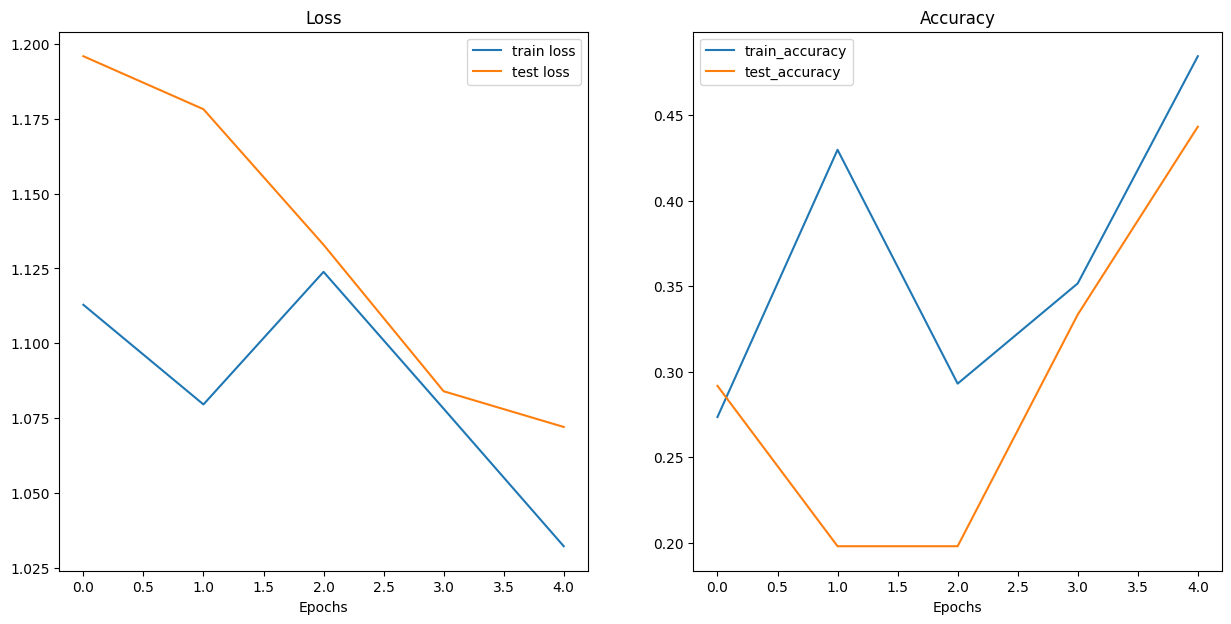

In [104]:


plot_loss_curves(model_1_result)


#lets again do the same thing, but this time with augumented transformation


In [105]:
train_transformation=transforms.Compose([
    transforms.Resize((64,64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31)
    ,transforms.ToTensor()
])

In [106]:
test_transformation=transforms.Compose([
    transforms.Resize((64,64))
    ,transforms.ToTensor()
])

##creating train and test dataset

In [117]:
from torchvision import datasets
augumented_train_datasets=datasets.ImageFolder(train_dir,transform=train_transformation)

augumented_test_datasets=datasets.ImageFolder(test_dir,transform=test_transformation)
augumented_train_datasets,augumented_test_datasets

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_sushi_steak/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_sushi_steak/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [118]:
class_names=augumented_train_datasets.classes
class_names

['pizza', 'steak', 'sushi']

##converting datasets to dataloader


In [119]:
import os
from torch.utils.data import DataLoader
BATCH_SIZE=32
NUM_WORKERS=os.cpu_count()
augumented_train_dataloader=DataLoader(augumented_train_datasets,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                            shuffle=True)


augumented_test_dataloader=DataLoader(augumented_test_datasets,
                            batch_size=BATCH_SIZE,
                            num_workers=NUM_WORKERS,
                           shuffle=False)

In [120]:
augumented_train_dataloader,augumented_test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x796b22fbf7f0>,
 <torch.utils.data.dataloader.DataLoader at 0x796b22fbf220>)

##counstructing the model


In [121]:
torch.manual_seed(42)
augumented_model=first_model(input_shape=3,
                             output_shape=len(class_names),
                             hidden_units=10).to(device)

In [122]:
augumented_model

first_model(
  (block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [124]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS=5
loss_fn=nn.CrossEntropyLoss()
optimizer1=torch.optim.Adam(augumented_model.parameters(),lr=0.001)

from timeit import default_timer as timer

start=timer()

augumented_model_result=train_and_test(
    model=augumented_model,
    train_dataloader=augumented_train_dataloader,
    test_dataloader=augumented_test_dataloader,

    optimizer=optimizer1,
    loss_fn=loss_fn,
    epochs=NUM_EPOCHS
)

end=timer()

print(f'total time taken: {end-start}')

  0%|          | 0/5 [00:00<?, ?it/s]

train loss: 1.103727176785469 | train acc: 0.375 | test loss: 1.160633385181427 | test acc: 0.2604166666666667
train loss: 1.0806781500577927 | train acc: 0.42578125 | test loss: 1.1796676913897197 | test acc: 0.2604166666666667
train loss: 1.0898772701621056 | train acc: 0.42578125 | test loss: 1.163826088110606 | test acc: 0.2604166666666667
train loss: 1.0999413430690765 | train acc: 0.3046875 | test loss: 1.1385512351989746 | test acc: 0.2604166666666667
train loss: 1.091687485575676 | train acc: 0.3203125 | test loss: 1.1197340091069539 | test acc: 0.25
total time taken: 9.594389458000023


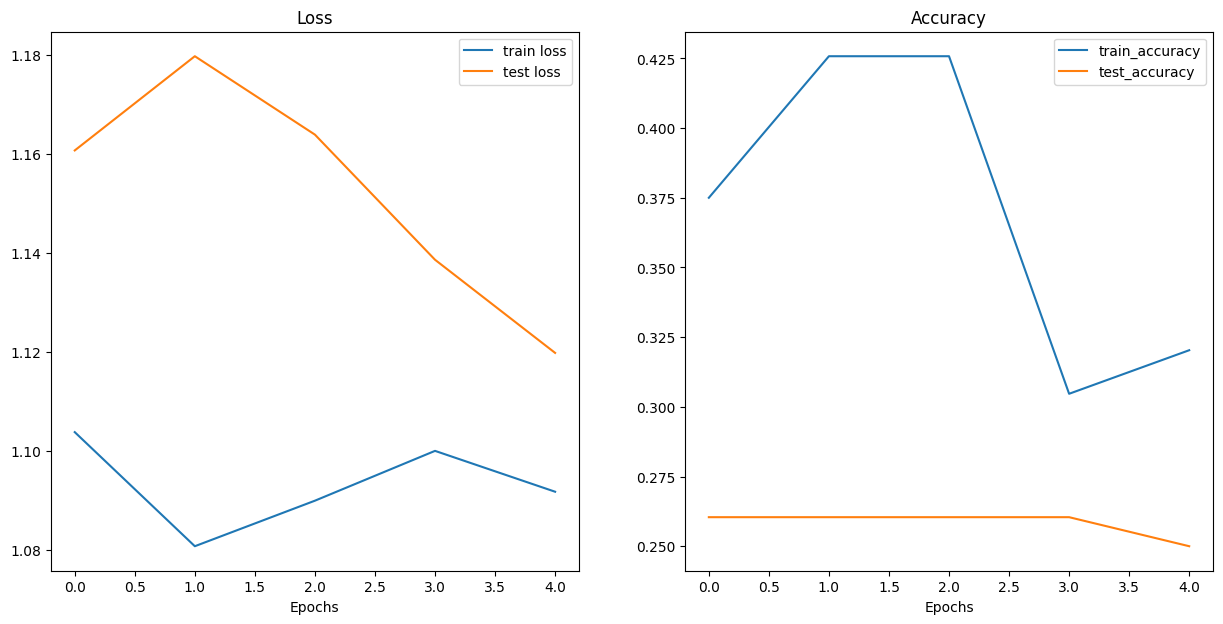

In [125]:
plot_loss_curves(augumented_model_result)